# Project: AI Impact on Job Market (2024–2030)

**Goal:** Use machine learning to predict whether a job is **increasing** or **decreasing** due to AI adoption, based on salary, automation risk, education, experience, and industry.

---

### Name: <span style="color:blue">*Haida Makouangou*</span>


## Utils

In [1]:

# TODO 1: Import all libraries

import os
import gc
import traceback
import warnings

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
)

warnings.filterwarnings("ignore")

plt.style.use("ggplot")






## Project: AI Impact on Job Market (2024–2030)

Goal: use machine learning to predict whether a job is **increasing** or **decreasing** due to AI adoption, based on salary, automation risk, education, industry, and other job characteristics.


In [2]:
# TODO 2: Load the AI job trends dataset

jobs_csv_path = "ai_job_trends_dataset.csv"

# load csv
ai_jobs_df = pd.read_csv(jobs_csv_path)

# First rows
ai_jobs_df.head()


,Job Title,Industry,Job Status,AI Impact Level,Median Salary (USD),Required Education,Experience Required (Years),Job Openings (2024),Projected Openings (2030),Remote Work Ratio (%),Automation Risk (%),Location,Gender Diversity (%)
0,Investment analyst,IT,Increasing,Moderate,42109.76,Master’s Degree,5,1515,6342,55.96,28.28,UK,44.63
1,"Journalist, newspaper",Manufacturing,Increasing,Moderate,132298.57,Master’s Degree,15,1243,6205,16.81,89.71,USA,66.39
2,Financial planner,Finance,Increasing,Low,143279.19,Bachelor’s Degree,4,3338,1154,91.82,72.97,Canada,41.13
3,Legal secretary,Healthcare,Increasing,High,97576.13,Associate Degree,15,7173,4060,1.89,99.94,Australia,65.76
4,Aeronautical engineer,IT,Increasing,Low,60956.63,Master’s Degree,13,5944,7396,53.76,37.65,Germany,72.57


In [3]:
# TODO 3: Check basic info: types, missing values

ai_jobs_df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Job Title                    30000 non-null  object 
 1   Industry                     30000 non-null  object 
 2   Job Status                   30000 non-null  object 
 3   AI Impact Level              30000 non-null  object 
 4   Median Salary (USD)          30000 non-null  float64
 5   Required Education           30000 non-null  object 
 6   Experience Required (Years)  30000 non-null  int64  
 7   Job Openings (2024)          30000 non-null  int64  
 8   Projected Openings (2030)    30000 non-null  int64  
 9   Remote Work Ratio (%)        30000 non-null  float64
 10  Automation Risk (%)          30000 non-null  float64
 11  Location                     30000 non-null  object 
 12  Gender Diversity (%)         30000 non-null  float64
dtypes: float64(4), i

In [4]:
# TODO 4 

ai_jobs_df.describe()



,Median Salary (USD),Experience Required (Years),Job Openings (2024),Projected Openings (2030),Remote Work Ratio (%),Automation Risk (%),Gender Diversity (%)
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,90119.965639,10.051433,5039.640833,5074.218100,49.836431,50.154229,49.979660
std,34412.013953,6.060678,2861.009654,2866.550722,28.966688,28.754889,17.274665
min,30001.860000,0.000000,100.000000,100.000000,0.000000,0.000000,20.000000
25%,60500.702500,5.000000,2570.000000,2586.750000,24.570000,25.400000,35.070000
50%,90274.115000,10.000000,5034.000000,5106.500000,49.570000,50.020000,49.885000
75%,119454.710000,15.000000,7527.000000,7573.000000,75.100000,75.030000,64.910000
max,149998.500000,20.000000,10000.000000,10000.000000,100.000000,99.990000,80.000000


### Creating the Target Variable

The original column **Job Status** has two categories: *Increasing* and *Decreasing*.  

For ML classification we convert it to a binary variable:

- Increasing → 1  
- Decreasing → 0  

This allows algorithms like Logistic Regression and Random Forest to work with the label.


In [5]:
# TODO 5: Create binary label for Job Status
# Increasing -> 1, Decreasing -> 0

ai_jobs_df["Job Status Binary"] = ai_jobs_df["Job Status"].map({
    "Increasing": 1,
    "Decreasing": 0
})

# check mapping
ai_jobs_df[["Job Status", "Job Status Binary"]].head()



,Job Status,Job Status Binary
0,Increasing,1
1,Increasing,1
2,Increasing,1
3,Increasing,1
4,Increasing,1


## Exploratory Data Analysis (EDA)

In this section I explore the distribution of the main variables and how they relate to **Job Status**.

I focus on:
- Balance between Increasing vs Decreasing jobs  
- Distribution of AI Impact Level  
- Salary distribution  
- Relationship between Automation Risk and Job Status


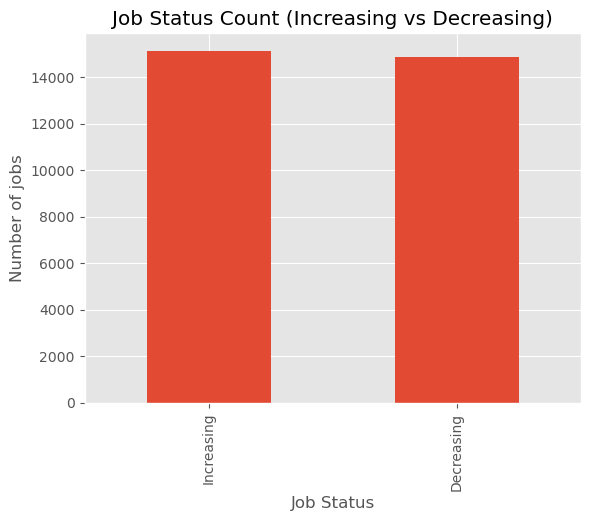

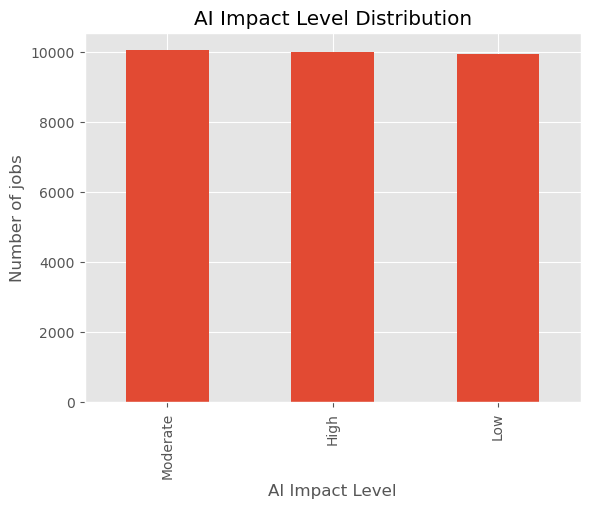

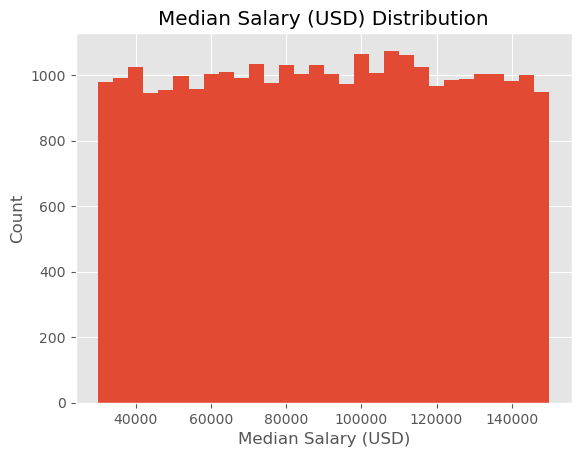

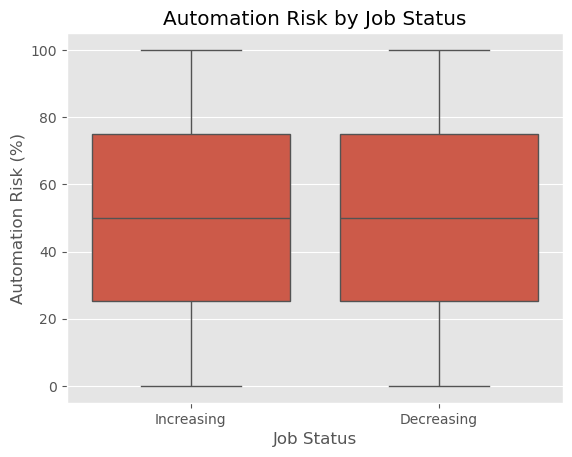

In [6]:
# TODO 6: EDA plots

# Step 5.1: Distribution of job status (balanced or not?)
ai_jobs_df["Job Status"].value_counts().plot(kind="bar")
plt.title("Job Status Count (Increasing vs Decreasing)")
plt.ylabel("Number of jobs")
plt.show()

# Step 5.2: AI impact level distribution
ai_jobs_df["AI Impact Level"].value_counts().plot(kind="bar")
plt.title("AI Impact Level Distribution")
plt.ylabel("Number of jobs")
plt.show()

# Step 5.3: Histogram of median salary
ai_jobs_df["Median Salary (USD)"].hist(bins=30)
plt.title("Median Salary (USD) Distribution")
plt.xlabel("Median Salary (USD)")
plt.ylabel("Count")
plt.show()

# Step 5.4: Automation risk vs job status
sns.boxplot(x="Job Status", y="Automation Risk (%)", data=ai_jobs_df)
plt.title("Automation Risk by Job Status")
plt.show()



## Feature Selection and Preprocessing

I use seven numeric features (salary, experience, openings, automation risk, etc.) and five categorical features (job title, industry, AI impact level, education, location).

- Numeric features are **standardized** using `StandardScaler`.  
- Categorical features are **one-hot encoded** using `OneHotEncoder`.

These transformations are implemented in a `ColumnTransformer` and combined with the models using a `Pipeline`. This keeps preprocessing and model training in one object and avoids data leakage.


In [7]:
# TODO 7: Define features and target

# numeric features
numeric_features = [
    "Median Salary (USD)",
    "Experience Required (Years)",
    "Job Openings (2024)",
    "Projected Openings (2030)",
    "Remote Work Ratio (%)",
    "Automation Risk (%)",
    "Gender Diversity (%)"
]

# categorical features
categorical_features = [
    "Job Title",
    "Industry",
    "AI Impact Level",
    "Required Education",
    "Location"
]

# feature matrix X and target vector y
X = ai_jobs_df[numeric_features + categorical_features]
y = ai_jobs_df["Job Status Binary"]

X.head()


,Median Salary (USD),Experience Required (Years),Job Openings (2024),Projected Openings (2030),Remote Work Ratio (%),Automation Risk (%),Gender Diversity (%),Job Title,Industry,AI Impact Level,Required Education,Location
0,42109.76,5,1515,6342,55.96,28.28,44.63,Investment analyst,IT,Moderate,Master’s Degree,UK
1,132298.57,15,1243,6205,16.81,89.71,66.39,"Journalist, newspaper",Manufacturing,Moderate,Master’s Degree,USA
2,143279.19,4,3338,1154,91.82,72.97,41.13,Financial planner,Finance,Low,Bachelor’s Degree,Canada
3,97576.13,15,7173,4060,1.89,99.94,65.76,Legal secretary,Healthcare,High,Associate Degree,Australia
4,60956.63,13,5944,7396,53.76,37.65,72.57,Aeronautical engineer,IT,Low,Master’s Degree,Germany


In [8]:
# TODO 8: Split into train, validation, and test sets

# First: train+val (80%) vs test (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X,
    y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

# Second: split train_val into train (60%) and val (20%)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val,
    y_train_val,
    test_size=0.25,   
    random_state=42,
    stratify=y_train_val
)

# check shapes
X_train.shape, X_val.shape, X_test.shape



((18000, 12), (6000, 12), (6000, 12))

In [9]:
# TODO 9: Build preprocessing (numeric + categorical)

# Scale numeric features
numeric_transformer = StandardScaler()

# One-hot encode categorical features
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

# Combine preprocessing steps
preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

preprocess




ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['Median Salary (USD)',
                                  'Experience Required (Years)',
                                  'Job Openings (2024)',
                                  'Projected Openings (2030)',
                                  'Remote Work Ratio (%)',
                                  'Automation Risk (%)',
                                  'Gender Diversity (%)']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['Job Title', 'Industry', 'AI Impact Level',
                                  'Required Education', 'Location'])])

## Machine Learning Models

I compare two supervised classification algorithms:

1. **Logistic Regression**
   - Linear model.
   - Easy to interpret and commonly used for binary classification.
2. **Random Forest Classifier**
   - Ensemble of decision trees.
   - Can model non-linear relationships and interactions.
   - Provides feature importance scores.

Both models share the same preprocessing pipeline so the comparison is fair.


In [10]:
# TODO 10: Build ML pipelines

# Logistic Regression model pipeline
log_reg_model = Pipeline(steps=[
    ("preprocess", preprocess),                    
    ("model", LogisticRegression(max_iter=1000))   
])

# Random Forest model pipeline
rf_model = Pipeline(steps=[
    ("preprocess", preprocess),                    
    ("model", RandomForestClassifier(
        n_estimators=200,                         
        random_state=42
    ))
])

log_reg_model, rf_model




(Pipeline(steps=[('preprocess',
                  ColumnTransformer(transformers=[('num', StandardScaler(),
                                                   ['Median Salary (USD)',
                                                    'Experience Required '
                                                    '(Years)',
                                                    'Job Openings (2024)',
                                                    'Projected Openings (2030)',
                                                    'Remote Work Ratio (%)',
                                                    'Automation Risk (%)',
                                                    'Gender Diversity (%)']),
                                                  ('cat',
                                                   OneHotEncoder(handle_unknown='ignore'),
                                                   ['Job Title', 'Industry',
                                                    'AI Impact Leve

In [11]:
# TODO 11: Train Logistic Regression
log_reg_model.fit(X_train, y_train)

# TODO 11 (cont.): Train Random Forest
rf_model.fit(X_train, y_train)



Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Median Salary (USD)',
                                                   'Experience Required '
                                                   '(Years)',
                                                   'Job Openings (2024)',
                                                   'Projected Openings (2030)',
                                                   'Remote Work Ratio (%)',
                                                   'Automation Risk (%)',
                                                   'Gender Diversity (%)']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Job Title', 'Industry',
                                                   'AI Impact Level',
                                                   'Required Education',
                                                   'Location'])])),
                ('model',
                 RandomForestClassifier(n_estimators=200, random_state=42))])

In [12]:
# TODO 12: Simple evaluation function

def evaluate(model, X_train, y_train, X_val, y_val, name="Model"):
    print(f"===== {name} Evaluation =====")

    # Train accuracy
    train_pred = model.predict(X_train)
    print("Train Accuracy:", accuracy_score(y_train, train_pred))

    # Validation accuracy
    val_pred = model.predict(X_val)
    print("Validation Accuracy:", accuracy_score(y_val, val_pred))

    # Classification report
    print("\nClassification Report:")
    print(classification_report(
        y_val,
        val_pred,
        target_names=["Decreasing", "Increasing"]
    ))

    # Confusion matrix
    cm = confusion_matrix(y_val, val_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=["Pred: Dec", "Pred: Inc"],
        yticklabels=["True: Dec", "True: Inc"]
    )
    plt.title(f"{name} - Validation Confusion Matrix")
    plt.show()


===== Logistic Regression Evaluation =====
Train Accuracy: 0.5795555555555556
Validation Accuracy: 0.5016666666666667

Classification Report:
              precision    recall  f1-score   support

  Decreasing       0.50      0.48      0.49      2973
  Increasing       0.51      0.52      0.51      3027

    accuracy                           0.50      6000
   macro avg       0.50      0.50      0.50      6000
weighted avg       0.50      0.50      0.50      6000



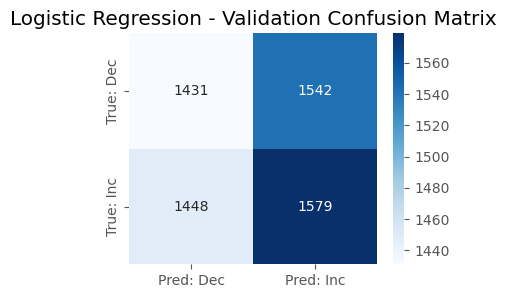

===== Random Forest Evaluation =====
Train Accuracy: 1.0
Validation Accuracy: 0.49

Classification Report:
              precision    recall  f1-score   support

  Decreasing       0.48      0.47      0.48      2973
  Increasing       0.49      0.51      0.50      3027

    accuracy                           0.49      6000
   macro avg       0.49      0.49      0.49      6000
weighted avg       0.49      0.49      0.49      6000



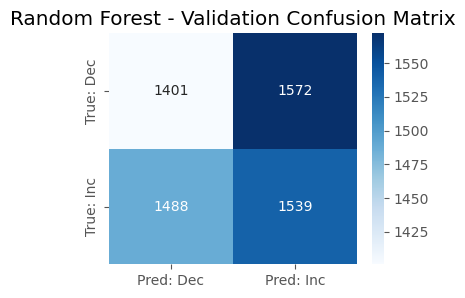

In [13]:
# TODO 13: Evaluate Logistic Regression
evaluate(
    model=log_reg_model,
    X_train=X_train,
    y_train=y_train,
    X_val=X_val,
    y_val=y_val,
    name="Logistic Regression"
)

# TODO 13 (cont.): Evaluate Random Forest
evaluate(
    model=rf_model,
    X_train=X_train,
    y_train=y_train,
    X_val=X_val,
    y_val=y_val,
    name="Random Forest"
)



### Baseline Model

To understand whether the ML models really add value, I create a simple baseline that always predicts the **majority class** in the training data.  

If my models only match this baseline, it means the features may not be very predictive, or more tuning is needed.


In [14]:
# TODO 14: Simple baseline - always predict majority class

from collections import Counter

# majority class in training data
class_counts = Counter(y_train)
majority_class = 1 if class_counts[1] >= class_counts[0] else 0

print("Majority class:", majority_class)

# baseline predictions on validation set
baseline_pred = np.full_like(y_val, fill_value=majority_class)

print("Baseline Accuracy (val):", accuracy_score(y_val, baseline_pred))



Majority class: 1
Baseline Accuracy (val): 0.5045


## Final Test Evaluation

Based on validation accuracy, I select the **Random Forest** as the best model.  

Here I retrain it on the combined training + validation data and evaluate it once on the held-out test set.


===== Final Test Set Performance =====
Test Accuracy: 0.49883333333333335

Classification Report (Test):
              precision    recall  f1-score   support

  Decreasing       0.49      0.48      0.49      2973
  Increasing       0.50      0.52      0.51      3027

    accuracy                           0.50      6000
   macro avg       0.50      0.50      0.50      6000
weighted avg       0.50      0.50      0.50      6000



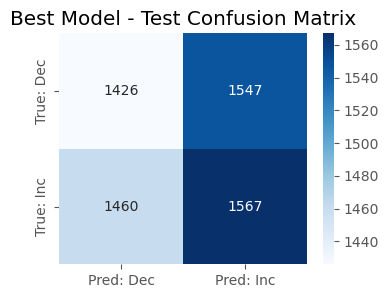

In [15]:
# TODO 15: Choose best model based on validation performance

best_model = rf_model   

# retrain best model on full training data (train + val)
X_train_full = pd.concat([X_train, X_val], axis=0)
y_train_full = pd.concat([y_train, y_val], axis=0)

best_model.fit(X_train_full, y_train_full)

# evaluate on the hold-out test set
test_pred = best_model.predict(X_test)

print("===== Final Test Set Performance =====")
print("Test Accuracy:", accuracy_score(y_test, test_pred))
print("\nClassification Report (Test):")
print(classification_report(
    y_test,
    test_pred,
    target_names=["Decreasing", "Increasing"]
))

cm_test = confusion_matrix(y_test, test_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(
    cm_test,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Pred: Dec", "Pred: Inc"],
    yticklabels=["True: Dec", "True: Inc"]
)
plt.title("Best Model - Test Confusion Matrix")
plt.show()



## Feature Importance (Random Forest)

I inspect the feature importance scores to see which job characteristics contribute most to predicting whether a job is increasing or decreasing with AI adoption.


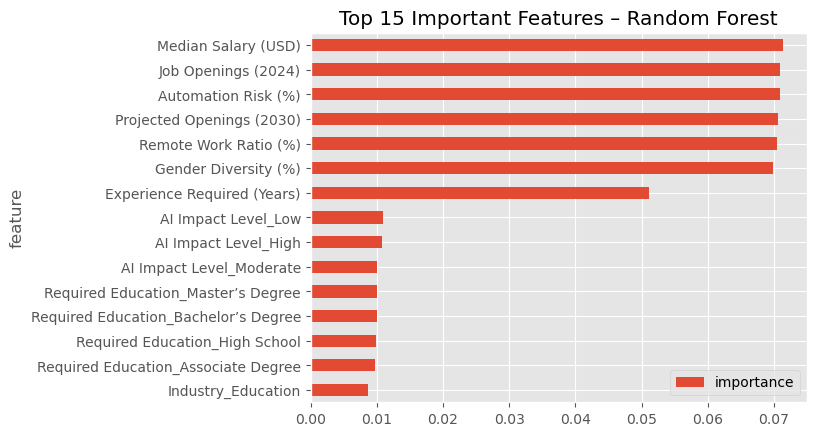

In [16]:
# TODO 16: Feature importance (Random Forest only)

# best_model should be the RF pipeline
rf = best_model.named_steps["model"]
ohe = best_model.named_steps["preprocess"].named_transformers_["cat"]

# Names for one-hot encoded categorical features
cat_feature_names = list(ohe.get_feature_names_out(categorical_features))
all_feature_names = numeric_features + cat_feature_names

importances = rf.feature_importances_

feat_imp_df = pd.DataFrame({
    "feature": all_feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False).head(15)

feat_imp_df.plot(kind="barh", x="feature", y="importance")
plt.title("Top 15 Important Features – Random Forest")
plt.gca().invert_yaxis()
plt.show()
